In [2]:
from display import Video
from matplotlib import pyplot as plt
from time import sleep
from pid import PID

video = Video()
print('Initialising stream...')
waited = 0
while not video.frame_available():
    waited += 1
    print('\r  Frame not available (x{})'.format(waited), end='')
    sleep(0.1)
    # cv2.waitKey(30)
    if waited > 100:
        print("failed")
        break
print('\nSuccess!\nStarting streaming - press "q" to quit.')




# Wait for the next frame to become available
if video.frame_available():
    # Only retrieve and display a frame if it's new
    frame = video.frame()
    # cv2.imshow('frame', frame)
# Allow frame to display, and check if user wants to quit
# if cv2.waitKey(1) & 0xFF == ord('q'):
#     break

plt.imshow(frame)

Initialising stream...
  Frame not available (x101)failed

Success!
Starting streaming - press "q" to quit.


NameError: name 'frame' is not defined

In [10]:
from dt_apriltags import Detector
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [11]:
img = cv2.imread('test_image.png', cv2.IMREAD_GRAYSCALE)

In [12]:
at_detector = Detector(families='tag36h11',
                       nthreads=1,
                       quad_decimate=1.0,
                       quad_sigma=0.0,
                       refine_edges=1,
                       decode_sharpening=0.25,
                       debug=0)

In [13]:
cameraMatrix = np.array([ 1060.71, 0, 960, 0, 1060.71, 540, 0, 0, 1]).reshape((3,3))

camera_params = ( cameraMatrix[0,0], cameraMatrix[1,1], cameraMatrix[0,2], cameraMatrix[1,2] )

In [14]:
tags = at_detector.detect(img, estimate_tag_pose=True, camera_params=camera_params, tag_size=0.1)

In [15]:
color_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

In [20]:
center = []

for tag in tags:
    centerX = 0
    centerY = 0
    for idx in range(len(tag.corners)):
        cv2.line(color_img, tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0))
        centerX += tag.corners[idx][0]
        centerY += tag.corners[idx][1]
    center.append((centerX/4, centerY/4))
    cv2.putText(color_img, str(tag.tag_id),
                org=(tag.corners[0, 0].astype(int) + 10, tag.corners[0, 1].astype(int) + 10),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=0.8,
                color=(0, 0, 255))
    print(f'Translation: {tag.pose_t}  Rotation: {tag.pose_R}')
    

Translation: [[-3.77050683]
 [-2.05152529]
 [ 4.93928678]]  Rotation: [[ 0.99781904  0.05781449  0.03185359]
 [-0.00355608  0.52894684 -0.84864751]
 [-0.06591298  0.84668336  0.52799882]]
Translation: [[-1.91244868]
 [-1.77655287]
 [ 4.1126666 ]]  Rotation: [[ 0.92940518 -0.25746785  0.26441693]
 [ 0.1111026   0.87841225  0.46480978]
 [-0.35194064 -0.40261921  0.84500625]]
Translation: [[-1.31982514]
 [-0.51557693]
 [ 3.31177418]]  Rotation: [[-0.22936202  0.47868527 -0.84749836]
 [-0.96588896 -0.21947478  0.13743849]
 [-0.12021474  0.85011248  0.512696  ]]
Translation: [[-3.96910273]
 [-2.72898601]
 [ 6.56920821]]  Rotation: [[ 0.96711748  0.18391903 -0.17566324]
 [-0.12748204  0.94821492  0.29092404]
 [ 0.22007297 -0.25896381  0.9404816 ]]
Translation: [[-2.59283825]
 [-0.72247799]
 [ 3.5226137 ]]  Rotation: [[-0.98458609  0.02116612  0.17361519]
 [ 0.01272417 -0.98135148  0.19180032]
 [ 0.17443719  0.19105303  0.9659557 ]]


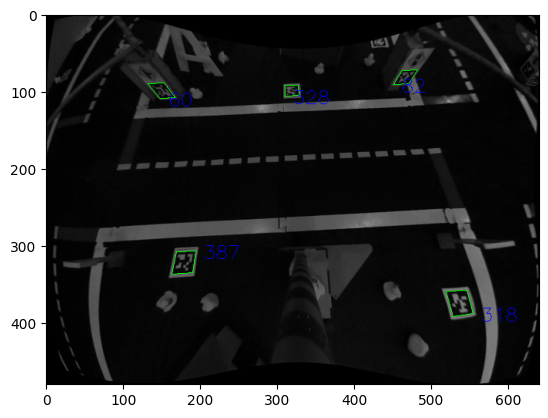

In [17]:
plt.imshow(color_img)

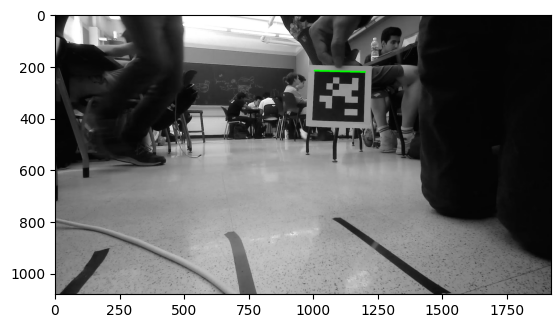

X error 0.06945575189390425
Y error -0.11357915601761313


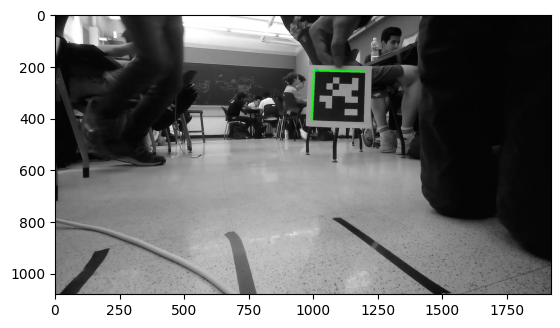

X error 0.06945575189390425
Y error -0.11357915601761313


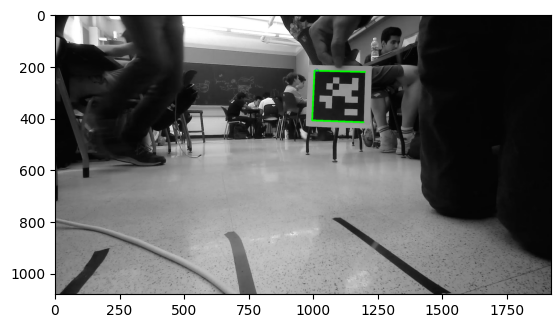

X error 0.06945575189390425
Y error -0.11357915601761313


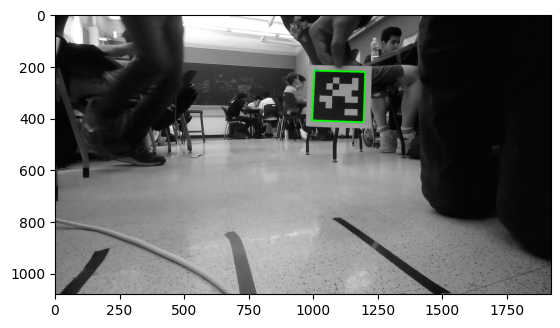

X error 0.06945575189390425
Y error -0.11357915601761313


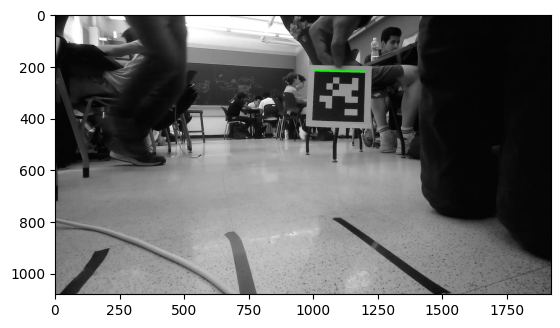

X error 0.06940982779585786
Y error -0.11348072816484805


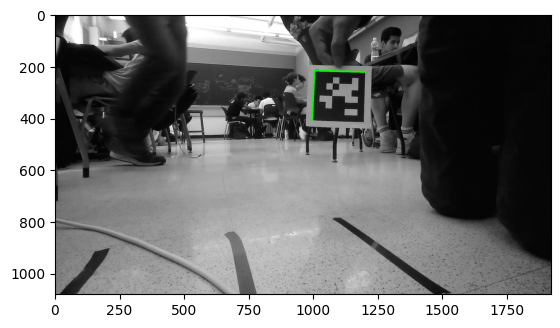

X error 0.06940982779585786
Y error -0.11348072816484805


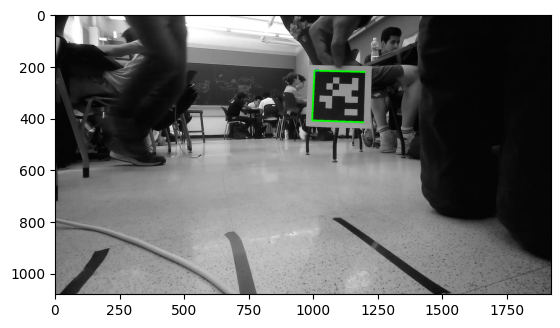

X error 0.06940982779585786
Y error -0.11348072816484805


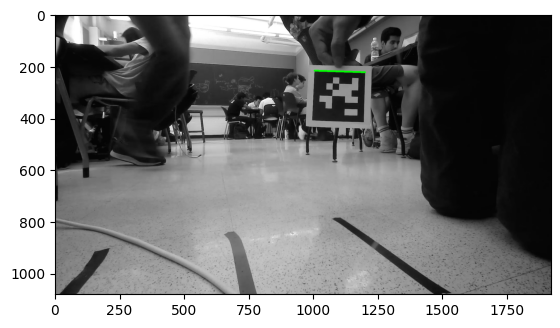

X error 0.06933421063294144
Y error -0.11333941195584296


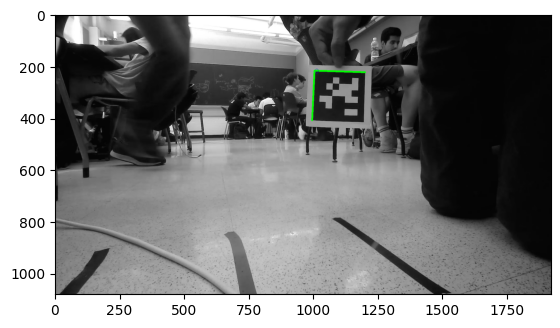

X error 0.06933421063294144
Y error -0.11333941195584296


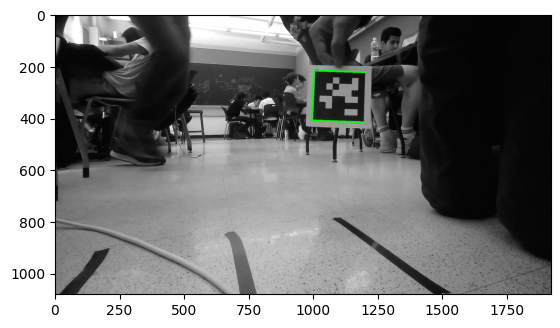

X error 0.06933421063294144
Y error -0.11333941195584296


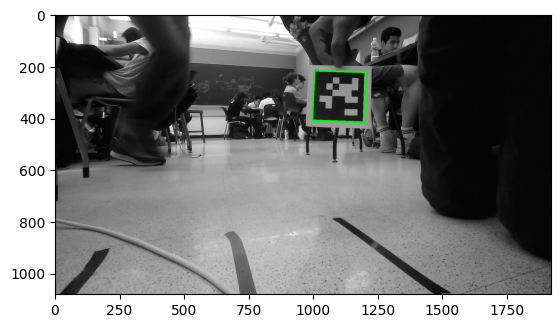

X error 0.06933421063294144
Y error -0.11333941195584296


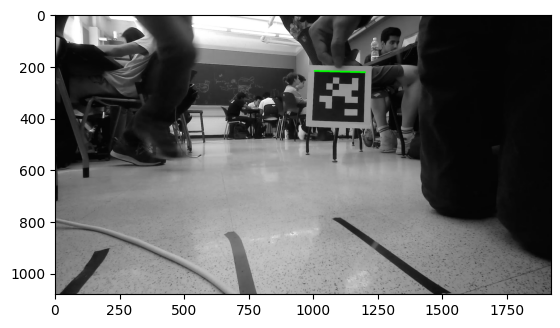

X error 0.06919198351959274
Y error -0.11316690794093634


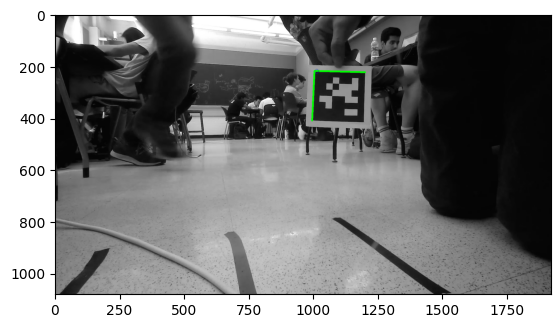

X error 0.06919198351959274
Y error -0.11316690794093634


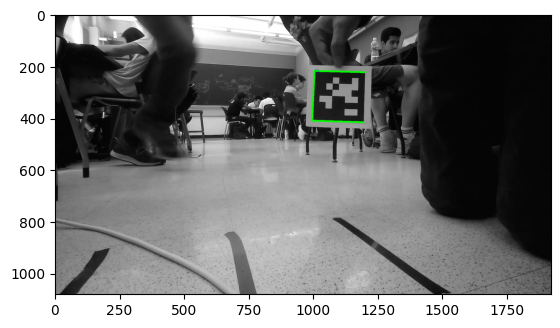

X error 0.06919198351959274
Y error -0.11316690794093634


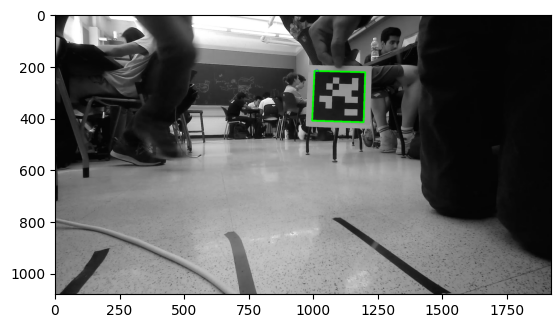

X error 0.06919198351959274
Y error -0.11316690794093634


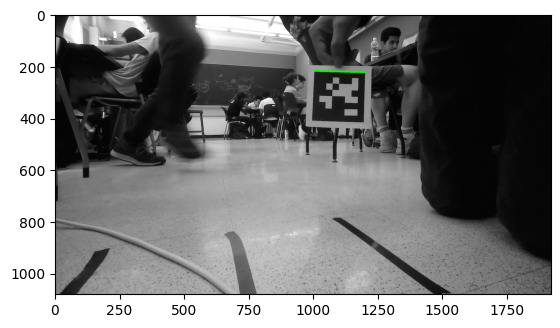

X error 0.0690489982826497
Y error -0.11290909254876204


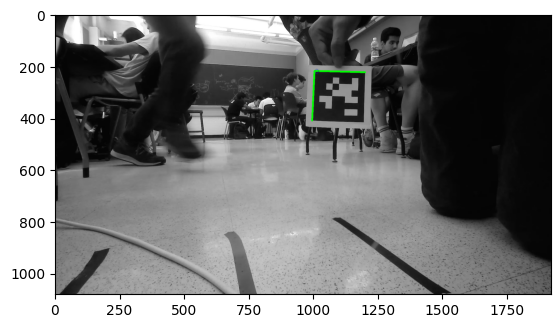

X error 0.0690489982826497
Y error -0.11290909254876204


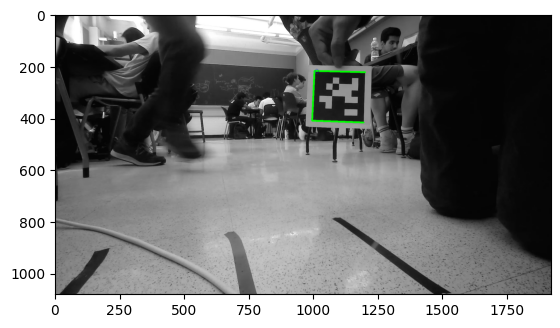

X error 0.0690489982826497
Y error -0.11290909254876204


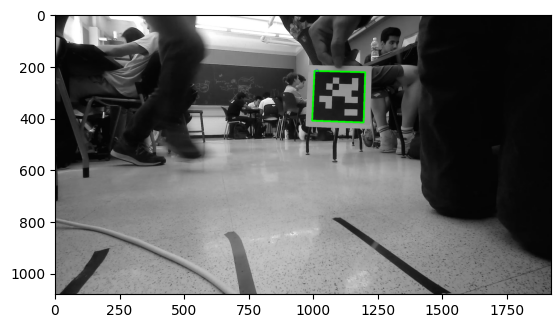

In [1]:
import cv2
from dt_apriltags import Detector
import numpy as np
import matplotlib.pyplot as plt
from pid import PID

video = cv2.VideoCapture('AprilTagTest.mkv')

fps = int(video.get(cv2.CAP_PROP_FPS))
width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

output_file = 'april_tags.avi'
fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_video = cv2.VideoWriter(output_file, fourcc, 30, (width, height))

ret = True
cnt = 0
while cnt < 1:
    ret, frame = video.read()
    dimensions = frame.shape
    height = dimensions[0]/2
    width = dimensions[1]/2
    at_detector = Detector(families='tag36h11',
                       nthreads=1,
                       quad_decimate=1.0,
                       quad_sigma=0.0,
                       refine_edges=1,
                       decode_sharpening=0.25,
                       debug=0)
    cameraMatrix = np.array([ 1060.71, 0, 960, 0, 1060.71, 540, 0, 0, 1]).reshape((3,3))
    camera_params = ( cameraMatrix[0,0], cameraMatrix[1,1], cameraMatrix[0,2], cameraMatrix[1,2] )
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    tags = at_detector.detect(gray, estimate_tag_pose=True, camera_params = camera_params, tag_size=0.1)
    color_img = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)
    pid_x = PID(10, 0, 0, 100)
    pid_y = PID(10, 0, 0, 100)
    tags_center = [0, 0]
    try:
        # print(tags)
        for tag in tags:
            tags_center[0] += tag.center[0]
            tags_center[1] += tag.center[1]
            # print(tag)
            for idx in range(len(tag.corners)):
                
                cv2.line(color_img, tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0), 5)
                
            translation_matrix = tag.pose_t

            x = translation_matrix[0][0]
            y = translation_matrix[1][0]
            z = translation_matrix[2][0]
            print(f'X error {x}')
            print(f'Y error {y}')

            x_output = pid_x.update(x)
            y_output = pid_y.update(y)

            cv2.line(color_img, tuple(width - 15, height), tuple(width + 15, height), (255, 0, 0), 5)
            cv2.line(color_img, tuple(width, height - 15), tuple(width, height + 15), (255, 0, 0), 5)

            cv2.putText(color_img, str(tag.tag_id),
                org=(tag.corners[1, 0].astype(int) + 10, tag.corners[0, 1].astype(int) + 10),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=0.8,
                color=(0, 0, 255))
            
                
                
                # output_video.write(color_img)
        cnt+=1
    except:
        pass
    
video.release()
output_video.release()